# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [238]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

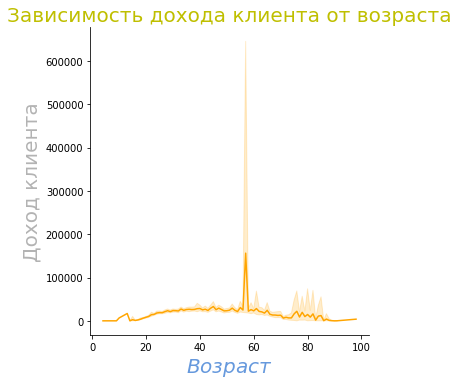

In [193]:
sns.relplot(x='age',
            y='income',
            data=df,
            kind='line',
            color='orange',
            ci=100
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('Зависимость дохода клиента от возраста', size=20, color='y');

В среднем доход клиента повышается до 40 лет, затем снижается, причём чем старше клиент, тем больше дипспресия. Примерно в 57 лет имеется значительное среднее повышение дохода.

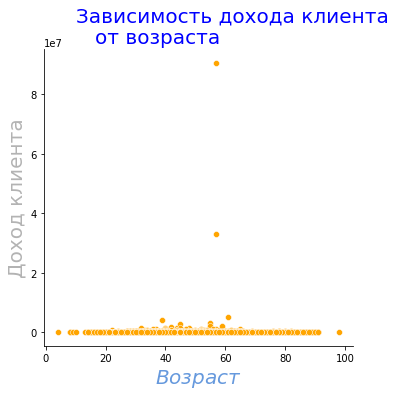

In [211]:
sns.relplot(x='age',
            y='income',
            data=df,
            kind='scatter',
            color='orange',
            ci=100
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('     Зависимость дохода клиента\n        от возраста', size=20, color='b', loc='left');

У двух клиентов значительно выше доход, чем у остальных. Этим клиентам чуть менее 60 лет и их среднемесячный доход более 20000000.

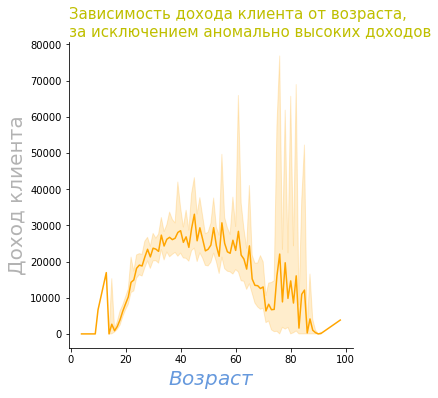

In [216]:
sns.relplot(x='age',
            y='income',
            data=df[df.income < 20000000],
            kind='line',
            color='orange',
            ci=100
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('Зависимость дохода клиента от возраста,\nза исключением аномально высоких доходов', size=15, color='y', loc='left');

В среднем доход клиента повышается примерно до 45 лет, затем снижается. К 75 годам доход немного повышается, затем снижается снова. Чем старше клиент, тем больше дипспресия доходов. Примерно до 45 лет отклонения по доходам относительно одинаковые, что в большую, что в меньшую сторону. После 45 лет отклонения в большую сторону существенно перевешивают. Это говорит о том, что после 45 лет, помимо снижения среднего дохода, также, в среднем снижается доля состоятельных клиентов.

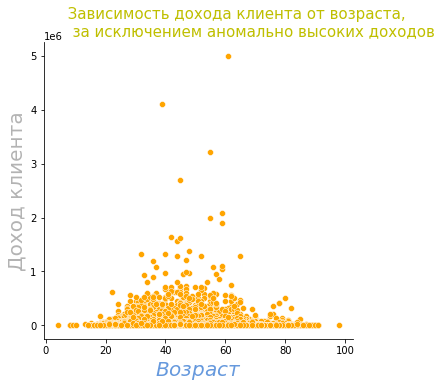

In [223]:
sns.relplot(x='age',
            y='income',
            data=df[df.income < 20000000],
            kind='scatter',
            color='orange',
            ci=100
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('     Зависимость дохода клиента от возраста,\n      за исключением аномально высоких доходов', size=15, color='y', loc='left');

Большая часть клиентов имеет доход менее 1000000 рублей

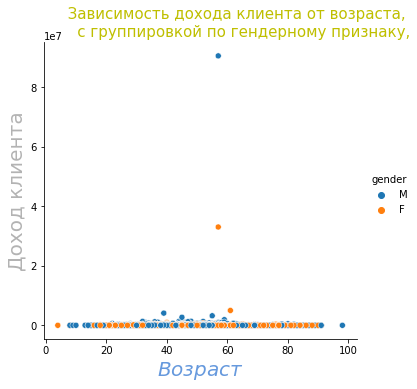

In [224]:
sns.relplot(x='age',
            y='income',
            data=df,
            hue='gender',
            sizes='Пол',
            kind='scatter',
            color='orange',
            ci=100
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('     Зависимость дохода клиента от возраста,\n       с группировкой по гендерному признаку,', size=15, color='y', loc='left');

Наиболее состоятельным клиентом является мужчина с доходом примерно 90000000, также есть довольно состоятельный клиент женщина с доходом примерно 38000000

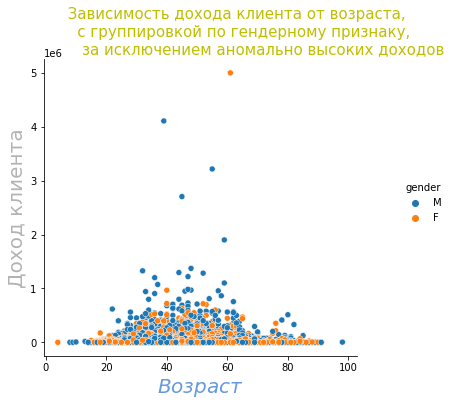

In [225]:
sns.relplot(x='age',
            y='income',
            data=df[df.income < 20000000],
            hue='gender',
            sizes='Пол',
            kind='scatter',
            color='orange',
            ci=100
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('     Зависимость дохода клиента от возраста,\n       с группировкой по гендерному признаку,\n        за исключением аномально высоких доходов', size=15, color='y', loc='left');

По гендерному признаку клиентов примерно поровну, но в основном более состоятельными клиентами являются мужчины.

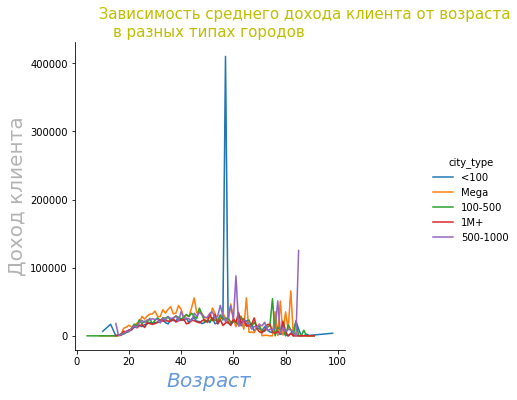

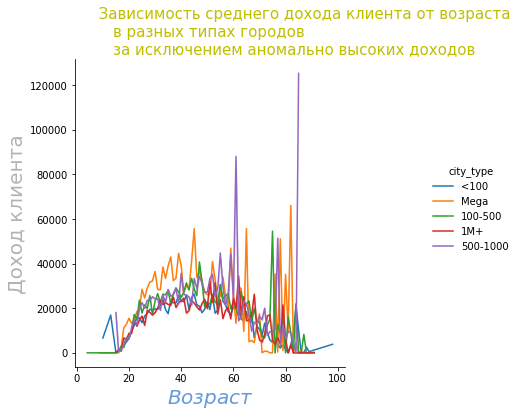

In [244]:
plt.subplot(2, 2, 2)
sns.relplot(x='age',
            y='income',
            data=df,
            kind='line',
            hue='city_type',
            color='orange',
            ci=1
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('     Зависимость среднего дохода клиента от возраста'
          '\n        в разных типах городов',
          size=15,
          color='y',
          loc='left');

plt.subplot(2, 2, 1)
sns.relplot(x='age',
            y='income',
            data=df[df.income < 20000000],
            kind='line',
            hue='city_type',
            color='orange',
            ci=1
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('     Зависимость среднего дохода клиента от возраста'
          '\n        в разных типах городов'
          '\n        за исключением аномально высоких доходов',
          size=15,
          color='y',
          loc='left');
plt.show()

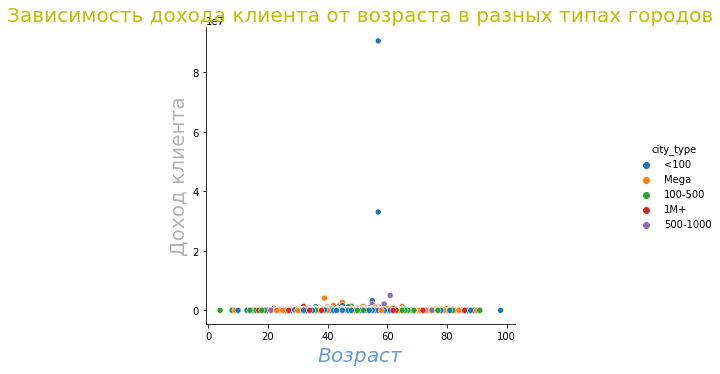

In [192]:
sns.relplot(x='age',
            y='income',
            data=df,
            kind='scatter',
            hue='city_type',
            color='orange'
            )
plt.xlabel('$Возраст$', size=20, color='#69d')
plt.ylabel('Доход клиента', size=20, color='.7')
plt.title('Зависимость дохода клиента от возраста в разных типах городов', size=20, color='y');

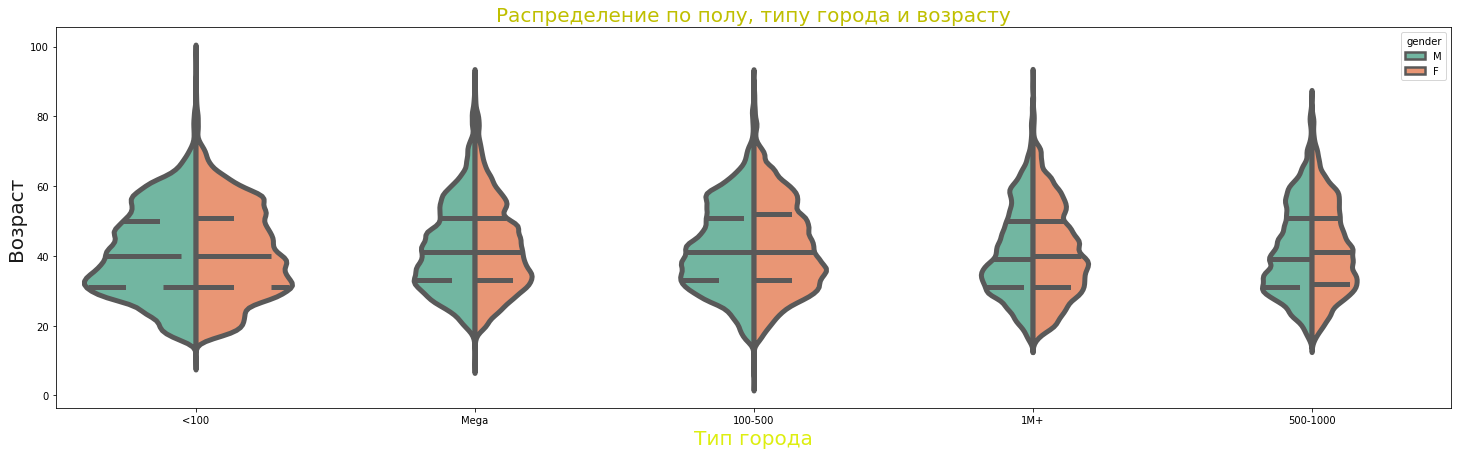

In [184]:
sns.violinplot(x='city_type',
               y='age',
               hue='gender',    # группирующая переменна
               data=df,
               bw=.1,            # сглаживание
               scale='count',   # масштабирование скрипичных диаграмм/по факту
               scale_hue=False, # масштабирование скрипичных диаграмм/выкл
               inner='quartile',# отрисовка квартилей распределения
               split=True,      # разделение/объединение скрипичных диаграмм
               linewidth = 5,   # ширина линии
               palette='Set2'  # расцветка для уровней hue
               );
plt.xlabel('Тип города', size=20, color='#DE1')
plt.ylabel('Возраст', size=20, color='.1')
plt.title('Распределение по полу, типу города и возрасту', size=20, color='y');